In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense,AveragePooling2D
from tensorflow.keras import optimizers, initializers, regularizers, metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen =  ImageDataGenerator(rescale = 1./255)

chair_train_generator = train_datagen.flow_from_directory(
       '/home/class1/2021.06.28/최종데이터셋_의자/train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=4,
       class_mode='binary')

chair_validation_generator = validation_datagen.flow_from_directory(
       '/home/class1/2021.06.28/최종데이터셋_의자/validation',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=4,
       class_mode='binary')

chair_test_generator = test_datagen.flow_from_directory(
       '/home/class1/2021.06.28/최종데이터셋_의자/test',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=4,
       class_mode='binary')

Found 404 images belonging to 2 classes.
Found 132 images belonging to 2 classes.
Found 132 images belonging to 2 classes.


In [66]:
chair_model = Sequential()
chair_model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(150, 150, 3), activation = 'relu', padding='same'))
chair_model.add(MaxPooling2D(pool_size=2))
chair_model.add(Conv2D(256, kernel_size=(3, 3), activation = 'relu', padding='same'))
chair_model.add(Conv2D(512, kernel_size=(3, 3), activation = 'relu', padding='same'))
chair_model.add(MaxPooling2D(pool_size=2))
chair_model.add(Conv2D(1024, kernel_size=(3, 3), activation = 'relu', padding='same'))
chair_model.add(MaxPooling2D(pool_size=2))
chair_model.add(Conv2D(512, kernel_size=(3, 3), activation = 'relu', padding='same'))
chair_model.add(MaxPooling2D(pool_size=2))
chair_model.add(Flatten())
chair_model.add(Dense(256, activation='relu'))
chair_model.add(Dropout(0.5))
chair_model.add(Dense(1, activation='sigmoid'))
chair_model.compile(loss = 'binary_crossentropy', optimizer = 'RMSProp', metrics=['accuracy'])

chair_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 75, 75, 256)       147712    
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 75, 75, 512)       1180160   
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 37, 37, 512)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 37, 37, 1024)      4719616   
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 18, 18, 1024)     

In [57]:
chair_train_generator[0][0][0].shape

(150, 150, 3)

In [86]:
lenet_5_model = Sequential()
lenet_5_model.add(Conv2D(6, kernel_size=(4,4), strides=1,  activation='relu', input_shape=chair_train_generator[0][0][0].shape, padding='same')), #C1
lenet_5_model.add(AveragePooling2D()), #S2
lenet_5_model.add(Conv2D(16, kernel_size=(4,4), strides=1, activation='relu', padding='valid')), #C3
lenet_5_model.add(AveragePooling2D()), #S4
lenet_5_model.add(Flatten()), #Flatten
lenet_5_model.add(Dense(120, activation='relu')), #C5
lenet_5_model.add(Dense(84, activation='relu')), #F6
lenet_5_model.add(Dense(1, activation='sigmoid')) #Output layer
lenet_5_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
lenet_5_model.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 150, 150, 6)       294       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 75, 75, 6)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 72, 72, 16)        1552      
_________________________________________________________________
average_pooling2d_15 (Averag (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 20736)             0         
_________________________________________________________________
dense_37 (Dense)             (None, 120)               2488440   
_________________________________________________________________
dense_38 (Dense)             (None, 84)              

In [68]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=3) # 모니터 기준 설정 (val loss) 
                                                               # 10회 Epoch동안 개선되지 않는다면 종료
    

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers


In [87]:
with tf.device('/GPU:0'):
    chair_history = chair_model.fit(
        chair_train_generator,
        steps_per_epoch=101,
        epochs=10,dd
        validation_data=chair_validation_generator,
        validation_steps=33,
        verbose=1,
        callbacks=[earlystopping]
    )

SyntaxError: invalid syntax (<ipython-input-87-2ccdbb509167>, line 6)

In [88]:
with tf.device('/GPU:0'):
    chair1_history = lenet_5_model.fit(
        chair_train_generator,
        steps_per_epoch=101,
        epochs=10,
        validation_data=chair_validation_generator,
        validation_steps=33,
        verbose=1,
        callbacks=[earlystopping]
    )

Epoch 1/10
101/101 [==============================] - 34s 333ms/step - loss: 0.7244 - accuracy: 0.5657 - val_loss: 0.4930 - val_accuracy: 0.6894
Epoch 2/10
101/101 [==============================] - 34s 334ms/step - loss: 0.4051 - accuracy: 0.8223 - val_loss: 0.2370 - val_accuracy: 0.9091
Epoch 3/10
101/101 [==============================] - 34s 338ms/step - loss: 0.2528 - accuracy: 0.8884 - val_loss: 0.2282 - val_accuracy: 0.9091
Epoch 4/10
101/101 [==============================] - 34s 333ms/step - loss: 0.1663 - accuracy: 0.9401 - val_loss: 0.4459 - val_accuracy: 0.8106
Epoch 5/10
101/101 [==============================] - 33s 330ms/step - loss: 0.1186 - accuracy: 0.9599 - val_loss: 0.5978 - val_accuracy: 0.7652
Epoch 6/10
101/101 [==============================] - 34s 334ms/step - loss: 0.0528 - accuracy: 0.9817 - val_loss: 0.7943 - val_accuracy: 0.7576


In [18]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen =  ImageDataGenerator(rescale = 1./255)

drawer_train_generator = train_datagen.flow_from_directory(
       '/home/class1/2021.06.28/최종데이터셋_서랍장/train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=4,
       class_mode='binary')

drawer_validation_generator = validation_datagen.flow_from_directory(
       '/home/class1/2021.06.28/최종데이터셋_서랍장/validation',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=4,
       class_mode='binary')

drawer_test_generator = test_datagen.flow_from_directory(
       '/home/class1/2021.06.28/최종데이터셋_서랍장/test',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=4,
       class_mode='binary')

Found 260 images belonging to 2 classes.
Found 86 images belonging to 2 classes.
Found 86 images belonging to 2 classes.


In [27]:
with tf.device('/GPU:0'):
    drawer_history = model.fit(
        drawer_train_generator,
        steps_per_epoch=65,
        epochs=10,
        validation_data=drawer_validation_generator,
        validation_steps=21,
        verbose=1,
        callbacks=[earlystopping]
    )

Epoch 1/10
65/65 [==============================] - 26s 401ms/step - loss: 0.7075 - accuracy: 0.7769 - val_loss: 0.3581 - val_accuracy: 0.8214
Epoch 2/10
65/65 [==============================] - 26s 394ms/step - loss: 0.3178 - accuracy: 0.9038 - val_loss: 0.4691 - val_accuracy: 0.8690
Epoch 3/10
65/65 [==============================] - 26s 398ms/step - loss: 0.1694 - accuracy: 0.9308 - val_loss: 0.5696 - val_accuracy: 0.8095
Epoch 4/10
65/65 [==============================] - 26s 402ms/step - loss: 0.1072 - accuracy: 0.9692 - val_loss: 0.7149 - val_accuracy: 0.8333


In [24]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen =  ImageDataGenerator(rescale = 1./255)

desk_train_generator = train_datagen.flow_from_directory(
       '/home/class1/2021.06.28/최종데이터셋_책상/train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=4,
       class_mode='binary')

desk_validation_generator = validation_datagen.flow_from_directory(
       '/home/class1/2021.06.28/최종데이터셋_책상/validation',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=4,
       class_mode='binary')

desk_test_generator = test_datagen.flow_from_directory(
       '/home/class1/2021.06.28/최종데이터셋_책상/test',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=4,
       class_mode='binary')

Found 274 images belonging to 2 classes.
Found 92 images belonging to 2 classes.
Found 94 images belonging to 2 classes.


In [28]:
with tf.device('/GPU:1'):
    desk_history = model.fit(
        desk_train_generator,
        steps_per_epoch=65,
        epochs=10,
        validation_data=desk_validation_generator,
        validation_steps=23,
        verbose=1,
        callbacks=[earlystopping]
    )

Epoch 1/10
65/65 [==============================] - 24s 368ms/step - loss: 0.4710 - accuracy: 0.8488 - val_loss: 0.4553 - val_accuracy: 0.8804
Epoch 2/10
65/65 [==============================] - 23s 354ms/step - loss: 0.3146 - accuracy: 0.9225 - val_loss: 0.4124 - val_accuracy: 0.9022
Epoch 3/10
65/65 [==============================] - 24s 359ms/step - loss: 0.1464 - accuracy: 0.9690 - val_loss: 0.3445 - val_accuracy: 0.8696
Epoch 4/10
65/65 [==============================] - 23s 355ms/step - loss: 0.0671 - accuracy: 0.9806 - val_loss: 0.4707 - val_accuracy: 0.9022
Epoch 5/10
65/65 [==============================] - 24s 366ms/step - loss: 0.1259 - accuracy: 0.9806 - val_loss: 0.4461 - val_accuracy: 0.9130
Epoch 6/10
65/65 [==============================] - 23s 365ms/step - loss: 0.2110 - accuracy: 0.9612 - val_loss: 0.5028 - val_accuracy: 0.8913


In [29]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen =  ImageDataGenerator(rescale = 1./255)

bed_train_generator = train_datagen.flow_from_directory(
       '/home/class1/2021.06.28/최종데이터셋_침대/train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=4,
       class_mode='binary')

bed_validation_generator = validation_datagen.flow_from_directory(
       '/home/class1/2021.06.28/최종데이터셋_침대/validation',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=4,
       class_mode='binary')

bed_test_generator = test_datagen.flow_from_directory(
       '/home/class1/2021.06.28/최종데이터셋_침대/test',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=4,
       class_mode='binary')

Found 97 images belonging to 2 classes.
Found 34 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


In [30]:
with tf.device('/GPU:1'):
    bed_history = model.fit(
        bed_train_generator,
        steps_per_epoch=24,
        epochs=10,
        validation_data=bed_validation_generator,
        validation_steps=9,
        verbose=1,
        callbacks=[earlystopping]
    )

Epoch 1/10
24/24 [==============================] - 10s 442ms/step - loss: 1.6851 - accuracy: 0.6989 - val_loss: 0.3276 - val_accuracy: 0.8824
Epoch 2/10
24/24 [==============================] - 9s 406ms/step - loss: 0.3804 - accuracy: 0.8817 - val_loss: 0.5290 - val_accuracy: 0.7941
Epoch 3/10
24/24 [==============================] - 10s 411ms/step - loss: 0.2025 - accuracy: 0.9355 - val_loss: 0.4472 - val_accuracy: 0.7941
Epoch 4/10
24/24 [==============================] - 10s 422ms/step - loss: 0.1165 - accuracy: 0.9677 - val_loss: 0.1625 - val_accuracy: 0.9118
Epoch 5/10
24/24 [==============================] - 10s 401ms/step - loss: 0.1669 - accuracy: 0.9570 - val_loss: 0.3105 - val_accuracy: 0.9412
Epoch 6/10
24/24 [==============================] - 10s 406ms/step - loss: 0.0517 - accuracy: 0.9785 - val_loss: 0.1366 - val_accuracy: 0.9412
Epoch 7/10
24/24 [==============================] - 9s 387ms/step - loss: 0.0562 - accuracy: 0.9892 - val_loss: 0.3530 - val_accuracy: 0.9412
E

In [89]:
evalution = lenet_5_model.evaluate(chair_test_generator,batch_size = 4)

33/33 [==============================] - 11s 329ms/step - loss: 0.7368 - accuracy: 0.7424


In [35]:
print(prediction)

[[1.0000000e+00]
 [1.0000000e+00]
 [9.9984193e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [8.1842583e-01]
 [1.0000000e+00]
 [3.8868158e-05]
 [9.9998498e-01]
 [5.3152653e-06]
 [1.1221528e-02]
 [1.0000000e+00]
 [9.9999976e-01]
 [1.0000000e+00]
 [4.9060742e-05]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.1067415e-03]
 [4.7491877e-08]
 [1.0000000e+00]
 [6.3024956e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.6481377e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [7.8133678e-01]
 [3.4447219e-03]
 [6.7620527e-04]
 [2.9320982e-03]
 [1.0000000e+00]
 [9.9381155e-01]
 [2.4602714e-06]
 [9.6814256e-05]
 [2.3126254e-02]
 [9.3976118e-02]
 [1.0000000e+00]
 [8.3717990e-01]
 [8.1292719e-01]
 [2.6866928e-05]
 [9.9083751e-01]
 [1.0000000e+00]
 [9.7222012e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.8430622e-07]
 [1.0000000e+00]
 [2.2043152e-05]
 [8.3066529e-01]
 [9.9999988e-01]
 [1.0000000e+00]
 [9.9982482e-01]
 [1.7685325e-08]
 [9.9999976e-0

## 서랍장

In [4]:
drawer_lenet_5_model = Sequential()
drawer_lenet_5_model.add(Conv2D(6, kernel_size=(4,4), strides=1,  activation='relu', input_shape=chair_train_generator[0][0][0].shape, padding='same')), #C1
drawer_lenet_5_model.add(AveragePooling2D()), #S2
drawer_lenet_5_model.add(Conv2D(16, kernel_size=(4,4), strides=1, activation='relu', padding='valid')), #C3
drawer_lenet_5_model.add(AveragePooling2D()), #S4
drawer_lenet_5_model.add(Flatten()), #Flatten
drawer_lenet_5_model.add(Dense(120, activation='relu')), #C5
drawer_lenet_5_model.add(Dense(84, activation='relu')), #F6
drawer_lenet_5_model.add(Dense(1, activation='sigmoid')) #Output layer
drawer_lenet_5_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
drawer_lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 6)       294       
_________________________________________________________________
average_pooling2d (AveragePo (None, 75, 75, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        1552      
_________________________________________________________________
average_pooling2d_1 (Average (None, 36, 36, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               2488440   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

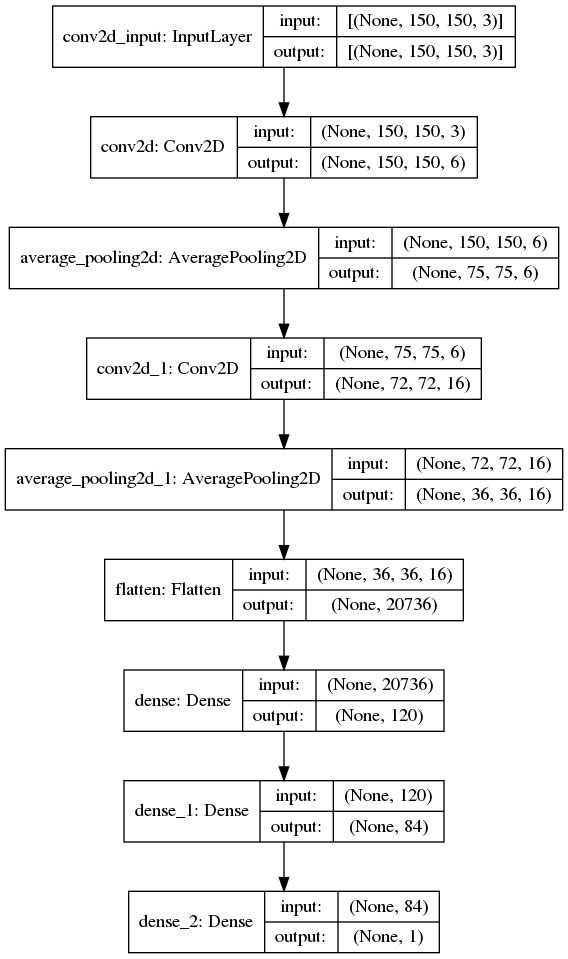

In [6]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

%matplotlib inline

plot_model(drawer_lenet_5_model, to_file='model_shapes.png', show_shapes=True)

In [91]:
with tf.device('/GPU:0'):
    drawer_history = drawer_lenet_5_model.fit(
        drawer_train_generator,
        steps_per_epoch=65,
        epochs=10,
        validation_data=drawer_validation_generator,
        validation_steps=21,
        verbose=1,
        callbacks=[earlystopping]
    )

Epoch 1/10
65/65 [==============================] - 26s 384ms/step - loss: 0.8679 - accuracy: 0.5901 - val_loss: 0.6685 - val_accuracy: 0.5238
Epoch 2/10
65/65 [==============================] - 25s 387ms/step - loss: 0.5945 - accuracy: 0.7077 - val_loss: 0.6355 - val_accuracy: 0.6190
Epoch 3/10
65/65 [==============================] - 25s 387ms/step - loss: 0.4536 - accuracy: 0.8074 - val_loss: 0.5843 - val_accuracy: 0.7500
Epoch 4/10
65/65 [==============================] - 26s 397ms/step - loss: 0.2986 - accuracy: 0.8928 - val_loss: 0.5300 - val_accuracy: 0.7262
Epoch 5/10
65/65 [==============================] - 26s 397ms/step - loss: 0.1215 - accuracy: 0.9729 - val_loss: 0.8580 - val_accuracy: 0.7024
Epoch 6/10
65/65 [==============================] - 25s 390ms/step - loss: 0.0922 - accuracy: 0.9600 - val_loss: 0.7074 - val_accuracy: 0.6786
Epoch 7/10
65/65 [==============================] - 25s 391ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.7646 - val_accuracy: 0.7857

In [96]:
evalution = drawer_lenet_5_model.evaluate(drawer_test_generator,batch_size = 4)

22/22 [==============================] - 6s 251ms/step - loss: 0.9803 - accuracy: 0.7326


## 책상

In [99]:
desk_lenet_5_model = Sequential()
desk_lenet_5_model.add(Conv2D(6, kernel_size=(4,4), strides=1,  activation='relu', input_shape=chair_train_generator[0][0][0].shape, padding='same')), #C1
desk_lenet_5_model.add(AveragePooling2D()), #S2
desk_lenet_5_model.add(Conv2D(16, kernel_size=(4,4), strides=1, activation='relu', padding='valid')), #C3
desk_lenet_5_model.add(AveragePooling2D()), #S4
desk_lenet_5_model.add(Flatten()), #Flatten
desk_lenet_5_model.add(Dense(120, activation='relu')), #C5
desk_lenet_5_model.add(Dense(84, activation='relu')), #F6
desk_lenet_5_model.add(Dense(1, activation='sigmoid')) #Output layer
desk_lenet_5_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
desk_lenet_5_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 150, 150, 6)       294       
_________________________________________________________________
average_pooling2d_20 (Averag (None, 75, 75, 6)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 72, 72, 16)        1552      
_________________________________________________________________
average_pooling2d_21 (Averag (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 20736)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 120)               2488440   
_________________________________________________________________
dense_47 (Dense)             (None, 84)              

In [100]:
with tf.device('/GPU:1'):
    desk_history = desk_lenet_5_model.fit(
        desk_train_generator,
        steps_per_epoch=65,
        epochs=10,
        validation_data=desk_validation_generator,
        validation_steps=23,
        verbose=1,
        callbacks=[earlystopping]
    )

Epoch 1/10
65/65 [==============================] - 24s 361ms/step - loss: 0.6626 - accuracy: 0.6056 - val_loss: 0.5843 - val_accuracy: 0.6957
Epoch 2/10
65/65 [==============================] - 23s 361ms/step - loss: 0.5606 - accuracy: 0.7021 - val_loss: 0.4435 - val_accuracy: 0.7717
Epoch 3/10
65/65 [==============================] - 23s 344ms/step - loss: 0.3683 - accuracy: 0.8531 - val_loss: 0.5561 - val_accuracy: 0.7174
Epoch 4/10
65/65 [==============================] - 24s 365ms/step - loss: 0.2532 - accuracy: 0.8966 - val_loss: 0.5680 - val_accuracy: 0.7283
Epoch 5/10
65/65 [==============================] - 23s 362ms/step - loss: 0.1444 - accuracy: 0.9470 - val_loss: 0.5860 - val_accuracy: 0.7826


In [101]:
evalution = desk_lenet_5_model.evaluate(desk_test_generator,batch_size = 4)

24/24 [==============================] - 7s 281ms/step - loss: 0.5168 - accuracy: 0.8191


## 침대

In [94]:
bed_lenet_5_model = Sequential()
bed_lenet_5_model.add(Conv2D(6, kernel_size=(4,4), strides=1,  activation='relu', input_shape=chair_train_generator[0][0][0].shape, padding='same')), #C1
bed_lenet_5_model.add(AveragePooling2D()), #S2
bed_lenet_5_model.add(Conv2D(16, kernel_size=(4,4), strides=1, activation='relu', padding='valid')), #C3
bed_lenet_5_model.add(AveragePooling2D()), #S4
bed_lenet_5_model.add(Flatten()), #Flatten
bed_lenet_5_model.add(Dense(120, activation='relu')), #C5
bed_lenet_5_model.add(Dense(84, activation='relu')), #F6
bed_lenet_5_model.add(Dense(1, activation='sigmoid')) #Output layer
bed_lenet_5_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
bed_lenet_5_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 150, 150, 6)       294       
_________________________________________________________________
average_pooling2d_18 (Averag (None, 75, 75, 6)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 72, 72, 16)        1552      
_________________________________________________________________
average_pooling2d_19 (Averag (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 20736)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 120)               2488440   
_________________________________________________________________
dense_44 (Dense)             (None, 84)              

In [95]:
with tf.device('/GPU:1'):
    bed_history = bed_lenet_5_model.fit(
        bed_train_generator,
        steps_per_epoch=24,
        epochs=10,
        validation_data=bed_validation_generator,
        validation_steps=9,
        verbose=1,
        callbacks=[earlystopping]
    )

Epoch 1/10
24/24 [==============================] - 10s 390ms/step - loss: 0.8126 - accuracy: 0.4596 - val_loss: 0.6925 - val_accuracy: 0.5588
Epoch 2/10
24/24 [==============================] - 9s 391ms/step - loss: 0.6507 - accuracy: 0.8155 - val_loss: 0.6949 - val_accuracy: 0.6176
Epoch 3/10
24/24 [==============================] - 9s 391ms/step - loss: 0.5504 - accuracy: 0.8177 - val_loss: 0.8552 - val_accuracy: 0.5588
Epoch 4/10
24/24 [==============================] - 9s 390ms/step - loss: 0.4145 - accuracy: 0.8298 - val_loss: 1.0744 - val_accuracy: 0.5588


In [98]:
evalution = bed_lenet_5_model.evaluate(bed_test_generator,batch_size = 4)

9/9 [==============================] - 3s 243ms/step - loss: 0.7655 - accuracy: 0.5588
